In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

First 4 cells are used in order to save the CSV file to a data frame, and drio cells with NaN values for their data values.

In [3]:
# Import dataset and save to Pandas Data Frame
path=".//Data//Alzheimer_s_Disease_and_Healthy_Aging_Data_20241031.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [5]:
df.columns

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

In [6]:
# Drop rows where no data value is saved
df_cleaned = df.dropna(subset=['Data_Value'])

# Percentages

In [8]:
# Split data into ones saved as percentages and ones saved as averages
df_percentages = df_cleaned[df_cleaned["Data_Value_Unit"] == '%'].groupby(['YearStart', 'Question'], as_index=False).agg({'Data_Value': 'mean'})

# CDC considers "older adults" as those 65+
df_percentages.sort_values(by="Data_Value", ascending=False)

,YearStart,Question,Data_Value
124,2019,Percentage of older adults who had a cholester...,94.841070
66,2017,Percentage of older adults who had a cholester...,94.480845
184,2021,Percentage of older adults who had a cholester...,94.328947
9,2015,Percentage of older adults who had a cholester...,91.314930
233,2022,Percentage of older adults without diabetes wh...,89.740270
...,...,...,...
105,2018,Percentage of older adults who reported binge ...,9.506723
165,2020,Percentage of older adults who reported binge ...,9.359731
193,2021,Percentage of older adults who reported binge ...,9.332121
17,2015,Percentage of older adults who reported binge ...,9.256463


Because there are 39 different questions for percentages in the data frame, the following cells group questions into 7 different plots in order to better visualize the data (prevent clutter)

In [10]:
# Add group numbers to all questions for graphing later
subset_cols = df_cleaned[["Question"]].drop_duplicates(subset='Question')
subset_cols["group"] = subset_cols.index % (len(subset_cols) // 5)

In [11]:
# Create a new data frame which apploes the group number of subset_cols to df_percentages
merged_df = pd.merge(df_percentages, subset_cols, left_on='Question', right_on='Question', how="outer")
merged_df = merged_df.dropna()

merged_df

,YearStart,Question,Data_Value,group
0,2015.0,Average of 20 or more hours of care per week p...,30.750682,3
1,2016.0,Average of 20 or more hours of care per week p...,34.233420,3
2,2017.0,Average of 20 or more hours of care per week p...,30.957299,3
3,2018.0,Average of 20 or more hours of care per week p...,36.041573,3
4,2019.0,Average of 20 or more hours of care per week p...,31.740891,3
...,...,...,...,...
229,2022.0,Percentage of older adults who report having a...,38.947767,5
230,2016.0,Percentage of older adults who report having l...,70.254938,0
231,2018.0,Percentage of older adults who report having l...,71.477723,0
232,2020.0,Percentage of older adults who report having l...,73.906938,0


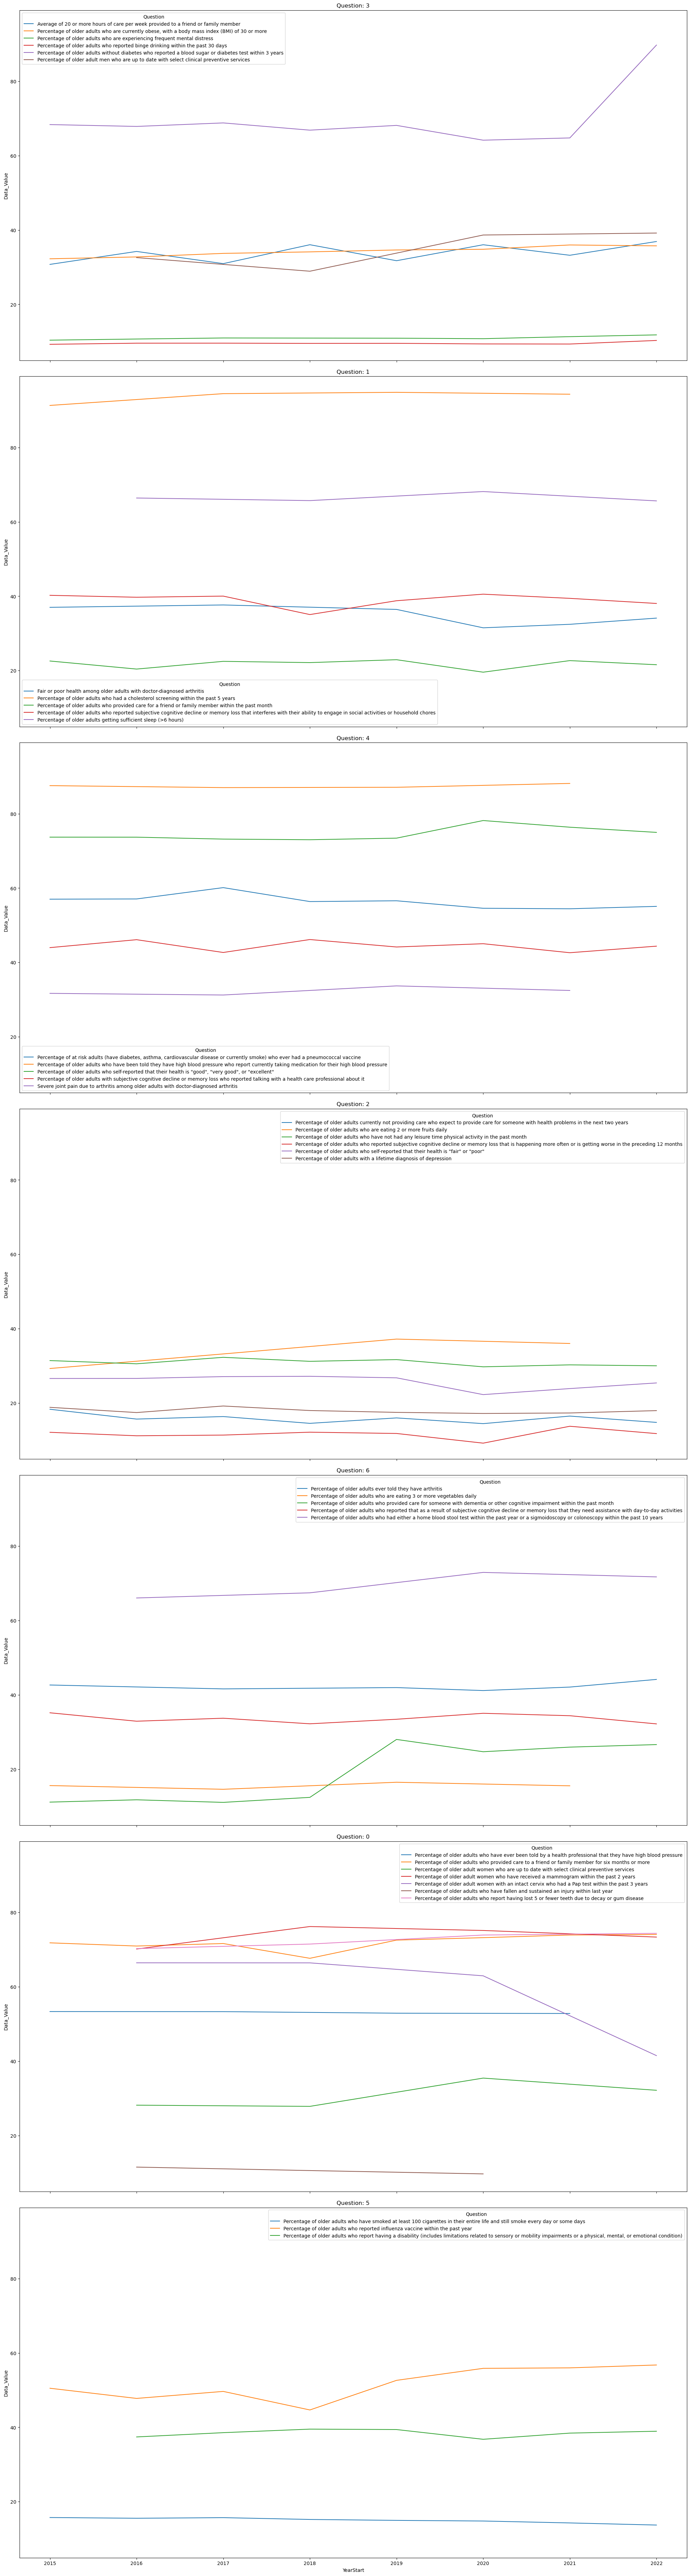

In [12]:
# Get the unique groups to create individual subplots
unique_groups = merged_df['group'].unique()

# Set up the figure and axes for individual subplots
num_plots = len(unique_groups)
cols = 1  # Set maximum number of columns per row
rows = (num_plots + cols - 1) // cols  # Calculate required rows
fig, axes = plt.subplots(rows, cols, figsize=(20, 75), constrained_layout=True, sharex=True, sharey=True)
axes = axes.flatten()  # Flatten in case we have extra subplots

# Plot each group as a separate subplot
for i, group in enumerate(unique_groups):
    ax = axes[i]
    data_subset = merged_df[merged_df['group'] == group]
    sns.lineplot(data=data_subset, x='YearStart', y='Data_Value', hue='Question', ax=ax)
    ax.set_title(f'Question: {group}')

# Hide any extra axes if the number of subplots doesn't fill the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

The following lines extract the data with the largest changes over the duration of the study by taking the year with the smallest value for each question, and the year with the largest value and calculates the difference between the two values. It then filters the data to only see ones with at least a 10% change (either positive or negative).

In [14]:
# Calculate the graphs with the largest differences and save them to a data frame
differences_df = df_percentages.groupby(['Question'], as_index=False).agg(
    Data_Value_min = ('Data_Value', 'min'),
    Data_Value_max = ('Data_Value', 'max')
)
differences_df['Difference'] = np.abs(differences_df['Data_Value_max'] - differences_df['Data_Value_min'])

In [15]:
# Set the largest changers to those with an increase of over 10%
top_changers = differences_df[differences_df["Difference"] >= 10.0]

# Create data frame of only largest changers and their data from df
question_subset = pd.merge(df_cleaned, top_changers, on='Question', how='inner')

In [16]:
question_subset.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Data_Value_min,Data_Value_max,Difference
0,BRFSS~2022~2022~9001~Q19~TSC04~AGE~OVERALL,2022,2022,NRE,Northeast,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,%,...,TSC04,Q19,9001,AGE,5064,OVERALL,OVERALL,64.155965,89.74027,25.584305
1,BRFSS~2022~2022~13~Q19~TSC04~AGE~RACE,2022,2022,GA,Georgia,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,%,...,TSC04,Q19,13,AGE,AGE_OVERALL,RACE,BLK,64.155965,89.74027,25.584305
2,BRFSS~2022~2022~9004~Q19~TSC04~AGE~OVERALL,2022,2022,WEST,West,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,%,...,TSC04,Q19,9004,AGE,5064,OVERALL,OVERALL,64.155965,89.74027,25.584305
3,BRFSS~2022~2022~15~Q19~TSC04~AGE~GENDER,2022,2022,HI,Hawaii,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,%,...,TSC04,Q19,15,AGE,65PLUS,GENDER,MALE,64.155965,89.74027,25.584305
4,BRFSS~2022~2022~78~Q19~TSC04~AGE~GENDER,2022,2022,VI,Virgin Islands,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,%,...,TSC04,Q19,78,AGE,AGE_OVERALL,GENDER,MALE,64.155965,89.74027,25.584305


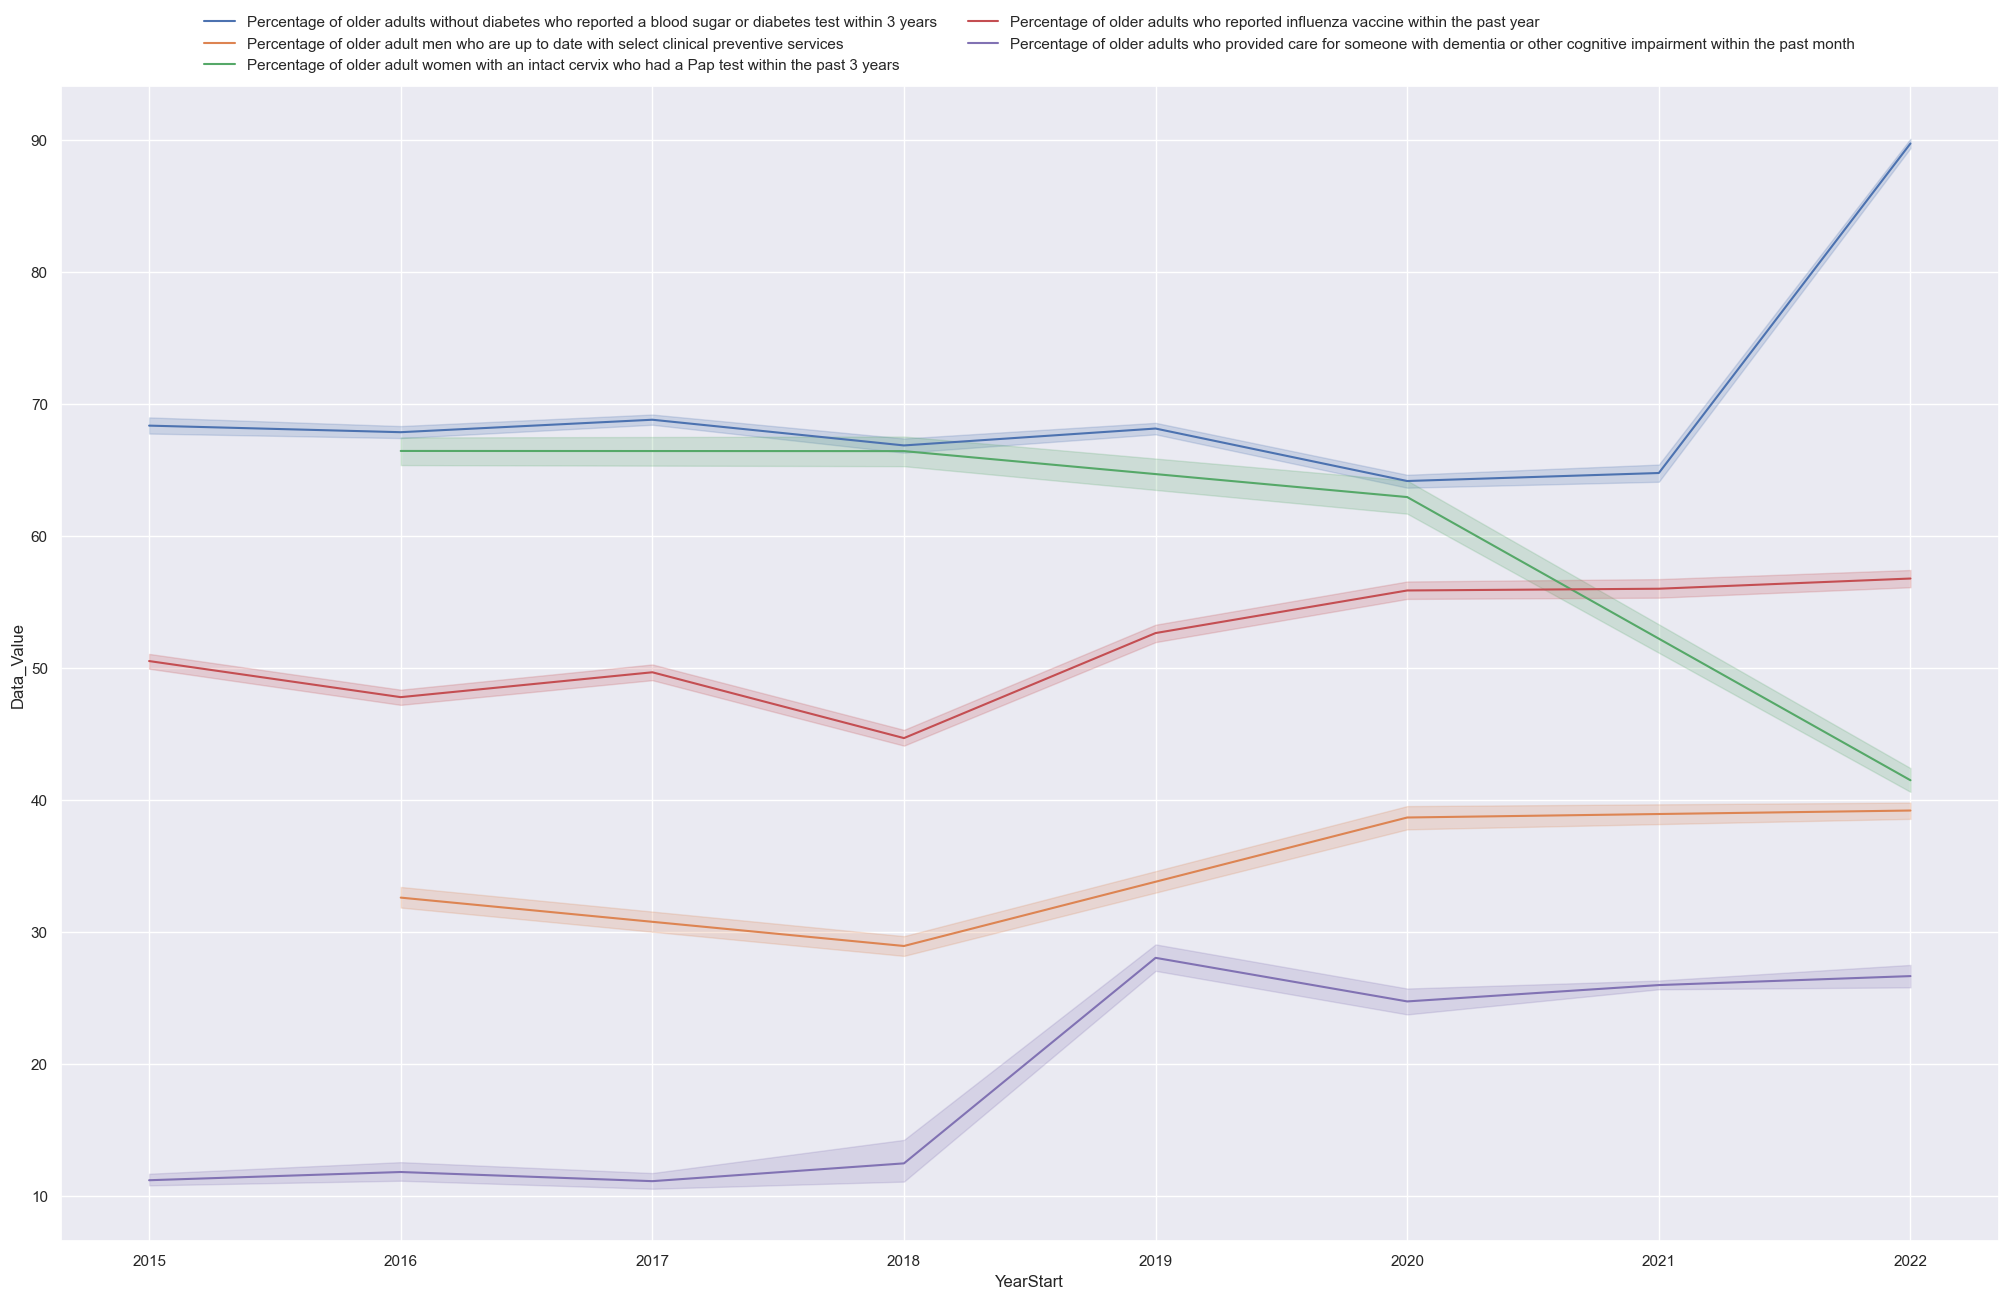

In [17]:
# Plot top changers for further analysis
sns.set(rc={'figure.figsize': (25, 15)})
ax = sns.lineplot(data=question_subset, x="YearStart", y="Data_Value", hue="Question")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)

# Mean

In [19]:
# Create sub-data frame of only mean values from df_cleaned
means = df_cleaned[df_cleaned["Data_Value_Type"] == "Mean"]

In [20]:
# Show questions resulting in mean values
means["Question"].unique()

array(['Mean number of days with activity limitations in the past month',
       'Physically unhealthy days (mean number of days in past month)'],
      dtype=object)

In [21]:
# Check how many results were returned for each question to understand survey information
first_mean_question = len(means[means["Question"] == 'Mean number of days with activity limitations in the past month'])
second_mean_question = len(means[means["Question"] == 'Physically unhealthy days (mean number of days in past month)'])

print(f"Number of responses to Q1: {first_mean_question}")
print(f"Number of responses to Q2: {second_mean_question}")

Number of responses to Q1: 7336
Number of responses to Q2: 7837


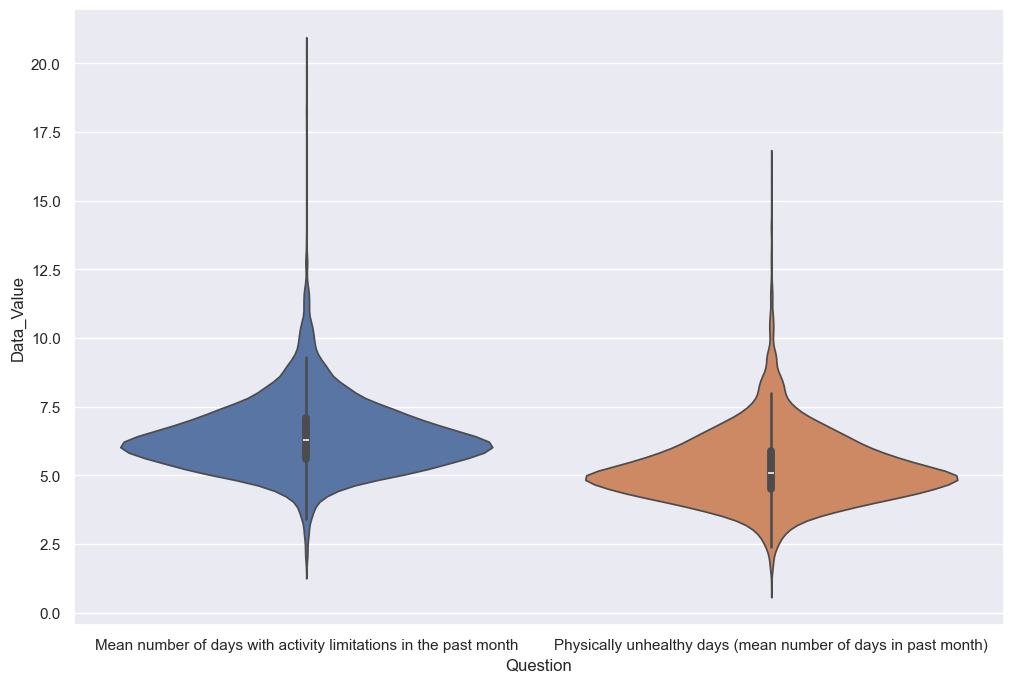

In [22]:
# Plot question 1 and question 2 result distributions to understand data distribution
plt.figure(figsize=(12, 8))
sns.violinplot(data=means, x="Question", y="Data_Value", hue="Question")
plt.show()

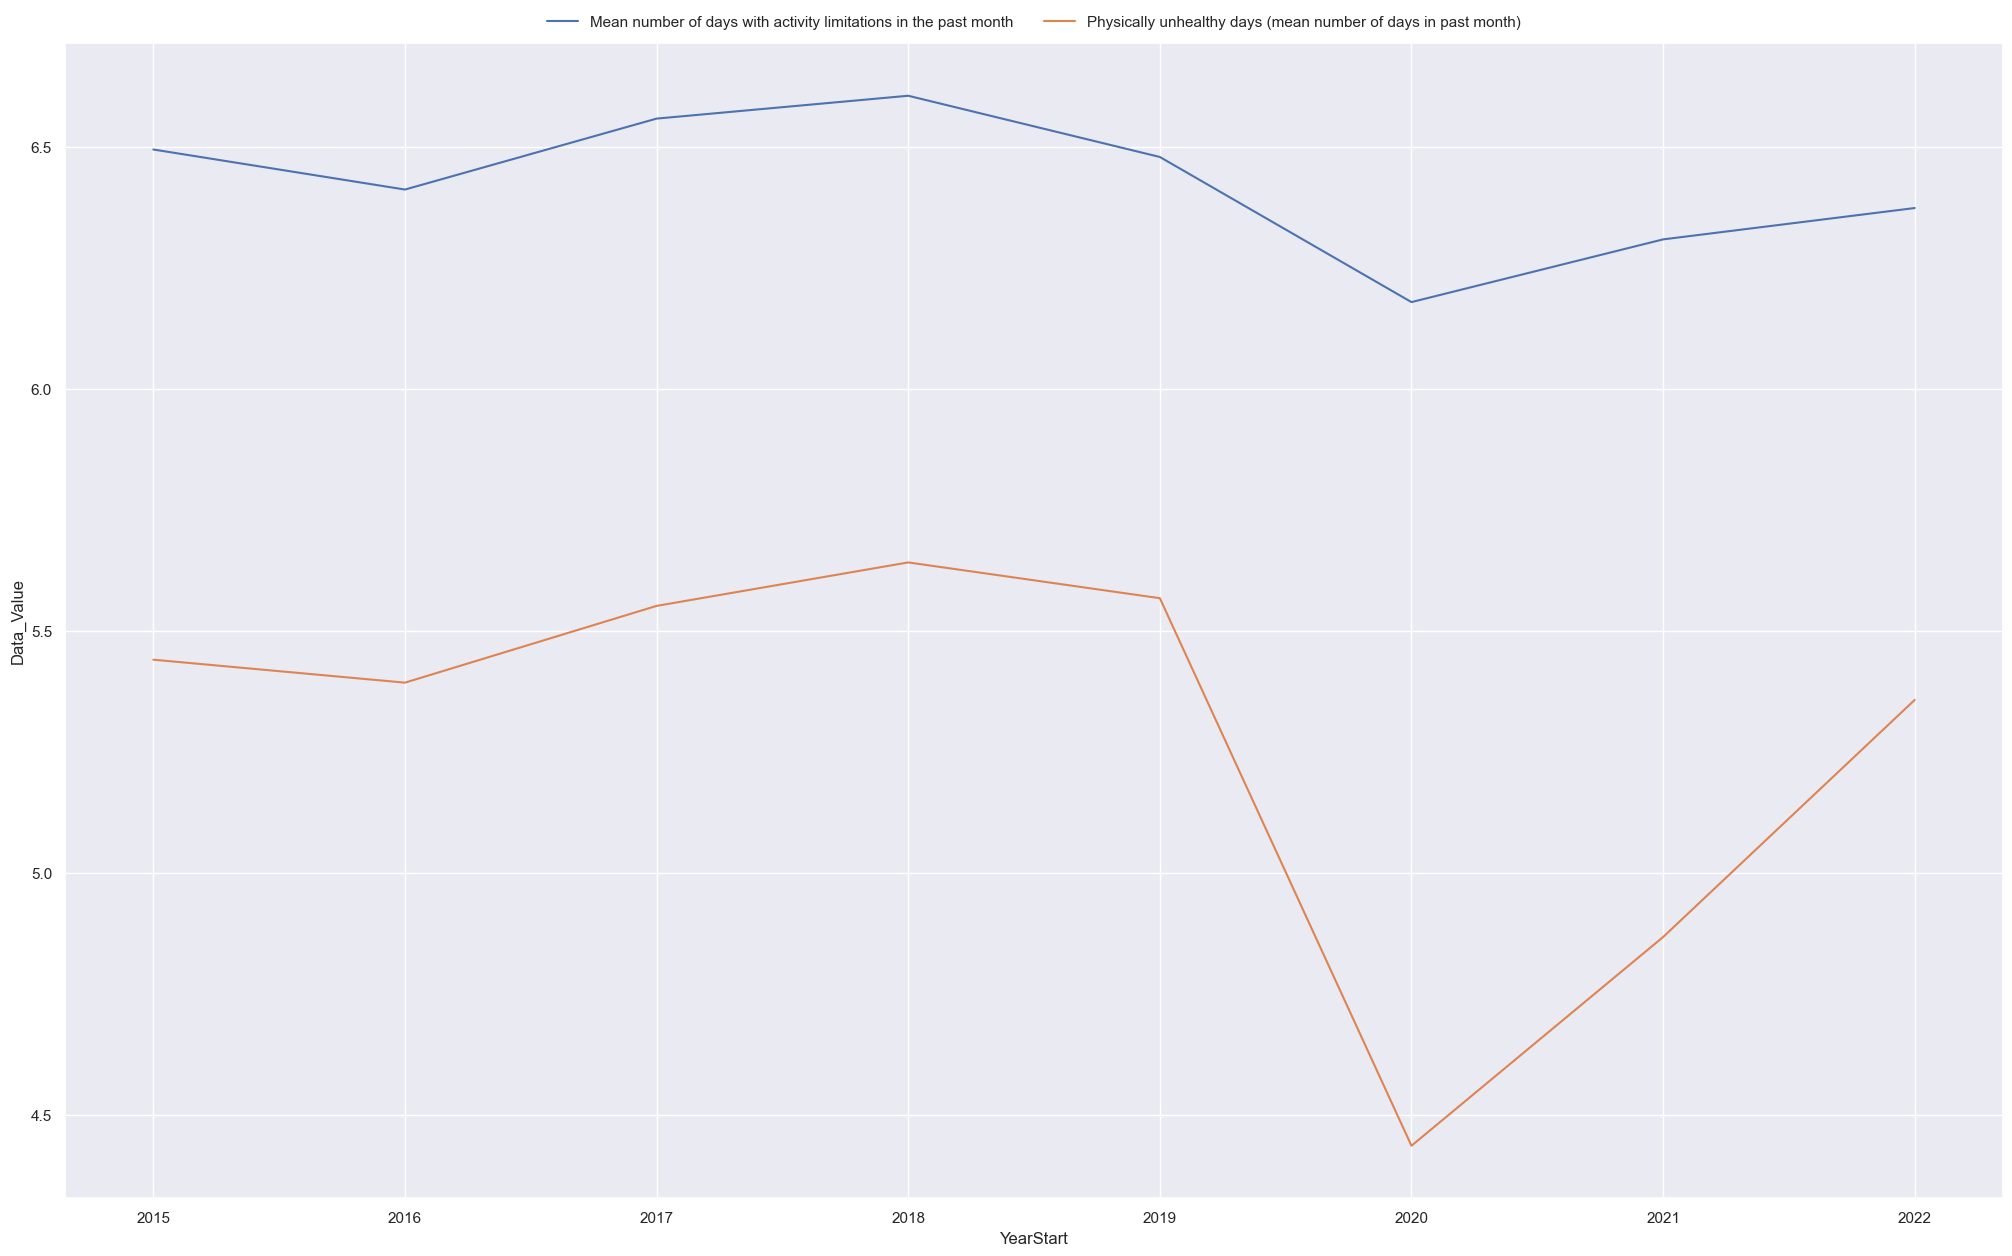

In [23]:
# Find average means for questions by year for graphing
df_means = means[means["Data_Value_Unit"] != '%'].groupby(['YearStart', 'Question'], as_index=False).agg({'Data_Value': 'mean'})

# Show means based on average mean from 2015 - 2022
ax = sns.lineplot(data=df_means, x="YearStart", y="Data_Value", hue="Question")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)